<a href="https://colab.research.google.com/github/ManishSuhas0026/Speech-Processing/blob/main/2348530_SPR_Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction

The Viterbi Algorithm is a dynamic programming method for finding the most likely sequence of hidden states in a Hidden Markov Model (HMM). In this implementation, we aim to decode the phoneme sequence for the word "hello" using given transition, emission, and initial probabilities. The observations correspond to acoustic feature vectors derived from the phonemes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def viterbi_algorithm(observations, states, start_prob, trans_prob, emis_prob):
    # Number of observations and states
    n_obs = len(observations)
    n_states = len(states)

    # Initialize the Viterbi matrix and path
    viterbi = np.zeros((n_states, n_obs))
    path = np.zeros((n_states, n_obs), dtype=int)

    # Initialization step
    for s in range(n_states):
        viterbi[s, 0] = start_prob[s] * emis_prob[s, observations[0]]
        path[s, 0] = s

    # Recursion step
    for t in range(1, n_obs):
        for s in range(n_states):
            max_prob = -1
            max_state = -1
            for s_prime in range(n_states):
                prob = viterbi[s_prime, t-1] * trans_prob[s_prime, s] * emis_prob[s, observations[t]]
                if prob > max_prob:
                    max_prob = prob
                    max_state = s_prime

            viterbi[s, t] = max_prob
            path[s, t] = max_state

    # Termination step
    max_prob = -1
    last_state = -1
    for s in range(n_states):
        if viterbi[s, n_obs-1] > max_prob:
            max_prob = viterbi[s, n_obs-1]
            last_state = s

    # Backtrack to find the most likely state sequence
    best_path = [last_state]
    for t in range(n_obs-1, 0, -1):
        best_path.insert(0, path[best_path[0], t])

    return best_path, max_prob, viterbi

Algorithm Workflow:

Initialization: Probabilities are calculated for the first observation using the initial probabilities.
Recursion: For each subsequent observation, the algorithm computes the probabilities by considering the most probable path to each state.
Termination: The final probabilities determine the most probable ending state.
Backtracking: The path matrix is used to reconstruct the most likely state sequence.

In [3]:
# Visualization function
def plot_viterbi(viterbi_matrix, states, observations):
    fig, ax = plt.subplots(figsize=(10, 6))
    cax = ax.matshow(viterbi_matrix, cmap="viridis")
    plt.colorbar(cax)

    ax.set_xticks(range(len(observations)))
    ax.set_yticks(range(len(states)))
    ax.set_xticklabels([f"O{i+1}" for i in range(len(observations))])
    ax.set_yticklabels(states)

    plt.xlabel("Observations")
    plt.ylabel("States")
    plt.title("Viterbi Matrix")
    plt.show()

In [4]:
# Define the problem parameters
states = ["/h/", "/e/", "/l/", "/o/"]
observations = [0, 1, 2, 3]  # Corresponding to [O1, O2, O3, O4]

start_prob = [1.0, 0.0, 0.0, 0.0]

trans_prob = np.array([
    [0.0, 0.7, 0.3, 0.0],
    [0.0, 0.2, 0.6, 0.2],
    [0.0, 0.0, 0.3, 0.7],
    [0.0, 0.0, 0.1, 0.9]
])

emis_prob = np.array([
    [0.6, 0.2, 0.1, 0.1],
    [0.1, 0.7, 0.1, 0.1],
    [0.1, 0.1, 0.6, 0.2],
    [0.2, 0.1, 0.2, 0.5]
])

# Execute the Viterbi Algorithm
best_path_indices, max_prob, viterbi_matrix = viterbi_algorithm(observations, states, start_prob, trans_prob, emis_prob)
best_path = [states[i] for i in best_path_indices]

# Output results
print("Most likely state sequence:", best_path)
print("Probability of the sequence:", max_prob)

Most likely state sequence: ['/h/', '/e/', '/l/', '/o/']
Probability of the sequence: 0.03704399999999999


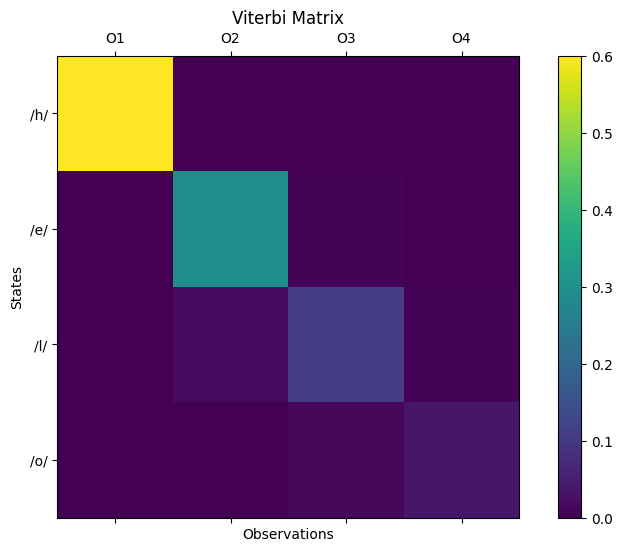

In [5]:
# Visualize the Viterbi matrix
plot_viterbi(viterbi_matrix, states, observations)

# Extra learning: Visualize the HMM as a graph
def plot_hmm_graph(states, trans_prob):
    G = nx.DiGraph()

    for i, state_from in enumerate(states):
        for j, state_to in enumerate(states):
            if trans_prob[i, j] > 0:
                G.add_edge(state_from, state_to, weight=trans_prob[i, j])

    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold', arrowsize=20)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)})
    plt.title("Hidden Markov Model Transition Graph")
    plt.show()

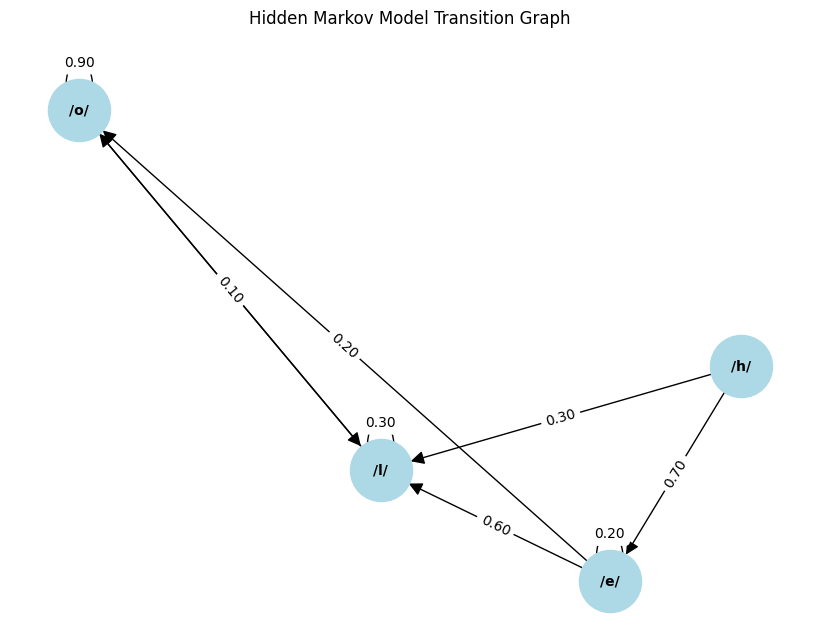

In [6]:
# Visualize the HMM
plot_hmm_graph(states, trans_prob)

Visualization:

The Viterbi matrix heatmap illustrates the probability distribution of states over observations.
The HMM graph shows the state transition probabilities, aiding in understanding the model dynamics.